In [55]:
import jieba
import pandas as pd
import numpy as np
import sklearn
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [56]:
def error(true, pred):
    error = np.square(np.subtract(true,pred)).mean(axis=0)
    return error

In [57]:
df = pd.read_excel("raw_data.xlsx",skiprows=1,usecols=["微博正文","点赞数","转发数","评论数"])
df = df.rename(columns = {'微博正文':'text', '点赞数':'like', '转发数':'comment','评论数':'forward'}, inplace=False)

In [58]:
df.head()

,text,like,comment,forward
0,【#你好，明天#】岁末年初，即便你的年终盘点一言难尽，但新年的flag仍然计日可期。需要抓住...,5389,1997,406
1,【今天，发条微博，向这些“闪亮的名字”致敬】南仁东、林俊德、张超、王继才、黄群、宋月才、姜开...,6826,1268,289
2,【夜读：这一年，谢谢自己】转眼间，2018年就要过去了。有时候我们很怕，怕自己的成长速度跟不...,6565,4326,580
3,【小调查：跨年夜，你如何度过的？】#2018最后一天#，你是如何度过的？陪在家人身边？宅在家...,919,2562,5281
4,【揭秘！习主席书架上的新变化】今晚，习近平主席发表了#2019新年贺词#。这一次，习主席书架...,6513,1758,440


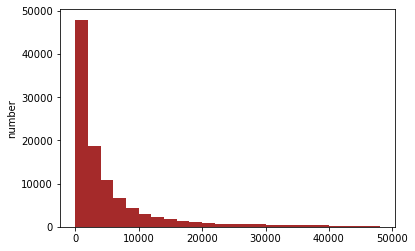

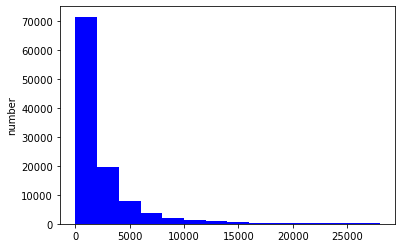

KeyboardInterrupt: 

In [59]:
plt.hist(df['like'], bins=np.arange(0,50000,2000), color = 'brown')
plt.ylabel('number')
plt.show()

plt.hist(df['comment'], bins=np.arange(0,30000,2000), color = 'blue')
plt.ylabel('number')
plt.show()

plt.hist(df['forward'], bins=np.arange(0,10000,2000), color = 'red')
plt.ylabel('number')
plt.show()

In [98]:
f = open('tfidf.txt', 'r')
allsentences = f.readlines()

for i in range(len(allsentences)):
    allsentences[i] = allsentences[i].strip('\n')
y = df[['like','comment','forward']]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(allsentences[:5000], y[:5000], test_size=.3, train_size=.7, random_state=0)

f.close()

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

 
#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features = 10000)
#该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()
#将文本转为词频矩阵并计算tf-idf
tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(X_train))
#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
X_train_weight = tf_idf.toarray()

#对测试集进行tf-idf权重计算
tf_idf = tf_idf_transformer.transform(vectorizer.transform(X_test))
X_test_weight = tf_idf.toarray()  # 测试集TF-IDF权重矩阵

#print('输出x_train文本向量：')
#print(X_train_weight)
#print('输出x_test文本向量：')
#print(X_test_weight)

In [65]:
model = LinearRegression().fit(X_train_weight, y_train)
y_train_pred = model.predict(X_train_weight)
y_test_pred = model.predict(X_test_weight)

In [66]:
y_train = y_train.to_numpy()
for i in y_train:
    i[2] = int(i[2])
y_test = y_test.to_numpy()
for i in y_test:
    i[2] = int(i[2])

train_error = error(y_train,y_train_pred)
test_error = error(y_test,y_test_pred)
print(train_error)
print(test_error)

[329.17054380580356 84.86463581194197 0.46442061941964285]
[6.609325817782492e+29 1.6973230165122337e+29 8.370367419126638e+26]
